# LINEAR FEEDBACK SHIFT REGISTERS

## NOTEBOOK 4 - MULTI-LFSRS

In this notebook we demonstrate the class `MultiLFSR`, which allows for combining `LFSR` objects in operating on bit states. 

If $L$ denotes an LFSR and $|B\rangle$ a bit state, denote by $|B^\prime\rangle = L|B\rangle$ the new bit state obtained by applying $L$ on $|B\rangle$. 

**Remark.** *In line with convention in quantum mechanics notation, we can denote by $\langle \mathcal O|L|B\rangle$ the output bit. Recall, it is simply the LSb in $|B\rangle$.* 

The LFSR $L$ is determined by its degree and tap positions. If we have another LFSR, say $L^\prime$ of the same degree (but different tap positions), it can be applied to $| B\rangle$ or $| B^\prime\rangle$ to generate another bit state. Set $L^\prime| B^\prime\rangle = | B^{\prime\prime}\rangle$.
The product $L^\prime L$ sends $|B\rangle \mapsto | B^{\prime\prime}\rangle$ and we can write,

\begin{align}
| B^{\prime\prime}\rangle = L^{\prime}L| B\rangle.
\end{align}

Note that $L^\prime L | B\rangle$ will not generally coincide with $LL^\prime | B\rangle$. Their failure to commute can be detected through the Hamming distance between the resulting bitstates $LL^\prime | B\rangle$ and $L^\prime L | B\rangle$

And so, for an arbitrary number of LFSRs of degree $d$, their product will define an operator on bit states of bit length $d$. In this notebook we will demonstrate the `MultiLFSR` class which allows for implemention of products of LFSRs.

#### LIBRARY IMPORTS

In [1]:
from lfsr_library import LFSR, MultiLFSR

### MULTI-LFSR INIT

Argumnents to initialise the class `MultiLFSR` are:

    - a list of type LFSR objects 
    - the degree, of type int

**Note** *If any LFSR has degree which differs from the `degree` keyword passed into `MultiLFSR`, ths class will fail to initialise.*

We initialise a multi-lfsr below.


In [2]:
DEGREE = 8

taps1: list[int] = [3, 4, 7]
lfsr1: LFSR = LFSR(degree=DEGREE, tap_positions=taps1)

taps2: list[int] = [0, 1]
lfsr2: LFSR = LFSR(degree=DEGREE, tap_positions=taps2)

taps3: list[int] = [2, 4, 5, 6]
lfsr3: LFSR = LFSR(degree=DEGREE, tap_positions=taps3)

lfsrs: list[LFSR] = [lfsr1, lfsr2, lfsr3]
multilfsr: MultiLFSR = MultiLFSR(degree=DEGREE, lfsr_list=lfsrs)

print(f"The degree of the multi-LFSR is: {multilfsr.degree}")
print(f"The feedback polynomials defining the multi-LFSR are:\n{*multilfsr.feedback_polynomials_sp,}")

The degree of the multi-LFSR is: 8
The feedback polynomials defining the multi-LFSR are:
(x**8 + x**7 + x**4 + x**3 + 1, x**8 + x + 1, x**8 + x**6 + x**5 + x**4 + x**2 + 1)


#### GENERATE

As with the `LFSR` class, we can call `.generate()` to generate an output stream from the `multilfsr` class object. Keywords to pass are:

    - a valid bit sequence, type str
    - the number of times to iterate, of type int

As with `LFSR`, the output stream and log file of state transitions are retrievable through `.stream` and `.log`, demonstrated below (note, only the first `10` entries from the log are printed).

In [3]:
SEED = 0b011001101
ITERATIONS = 500

multilfsr.generate(seed=SEED, iterations=ITERATIONS)

bitstream: str = multilfsr.stream
log: list[str] = multilfsr.log

print(f"The resulting bitstream is:\n{bitstream}\n")
for i, bitstate in enumerate(log):
    if i >= 10:
        break
    else:
        print(f"State {i}: {bitstate}")
    

The resulting bitstream is:
11101010010111100110110000010001110101001011110011011000001000111010100101111001101100000100011101010010111100110110000010001110101001011110011011000001000111010100101111001101100000100011101010010111100110110000010001110101001011110011011000001000111010100101111001101100000100011101010010111100110110000010001110101001011110011011000001000111010100101111001101100000100011101010010111100110110000010001110101001011110011011000001000111010100101111001101100000100011101010010111100110110000010001110

State 0: 11001101
State 1: 01011001
State 2: 00001011
State 3: 11100001
State 4: 10111100
State 5: 11110111
State 6: 10011110
State 7: 10110011
State 8: 01010110
State 9: 10101010


### RANDOMNESS

A Multi-LFSR, as with an LFSR, generates a stream of bits as output. Hence, masures of randomness can be called on `MultiLFSR` as on `LFSR` objects.

For the `MultiLFSR` object above, we find:


In [4]:
multilfsr.randomness(SIG_FIGS=2)
rand_dict: dict = multilfsr.randomness_dict
RANGE: range = range(100, 999)

for k, v in rand_dict.items():
    print(f"Probability bit = {k} is {v}")

multilfsr.generate_num(num_range=RANGE)
random_number = multilfsr.random_num
print(f"{random_number = }")


Probability bit = 0 is 51.40 %
Probability bit = 1 is 48.60 %
random_number = 759


Graphically, calling `.randomness_plot()` gives:

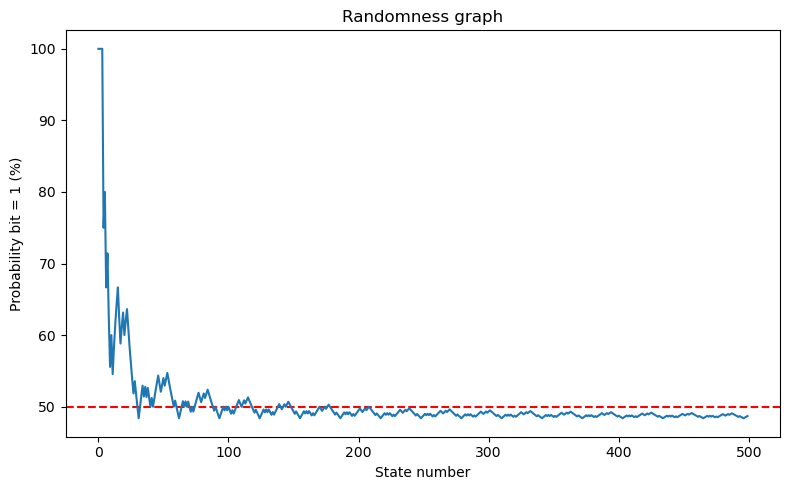

In [5]:
multilfsr.randomness_plot(figsize=(8, 5))

### COMPARISON


#### RANDOM DICT COMPARISONS
We can compare the randomness acheived by `Multi-LFSR` in comparison with a factor `LFSR` on the same seed bit state and for the same iteration number (recall, a multi LFSR is a product of LFSRs). See the code cell below where we compare `lfsr1` against `multilfsr`.

In [8]:
lfsr1.generate(bitseq=SEED, iterations=ITERATIONS-1)
lfsr1.randomness(SIG_FIGS=2)
lfsr1_randDict: dict = lfsr1.randomness_dict

for k, v in lfsr1_randDict.items():
    print(f"Probability (bit = {k} | LFSR 1) is {v}")
    print(f"Probability (bit = {k} | MULTILFSR) is {multilfsr.randomness_dict[k]}\n")


Probability (bit = 0 | LFSR 1) is 49.80 %
Probability (bit = 0 | MULTILFSR) is 51.40 %

Probability (bit = 1 | LFSR 1) is 50.20 %
Probability (bit = 1 | MULTILFSR) is 48.60 %



### COMPARISONS

#### PROBABILITIES 

The Bayesian probability comparisons above can be generated for each LFSR component of our Multi-LFSR by calling `.generate_comparison()` followed by `.print_comparisons()`, demonstrated below.

In [9]:
multilfsr.generate_comparison(SIG_FIGS=2)
multilfsr.print_comparisons()

Probability (bit = 0 | Multi-LSFR) = 51.40 %
Probability (bit = 1 | Multi-LSFR) = 48.60 %


Probability (bit = 0 | LFSR 0) = 49.80 %
Probability (bit = 1 | LFSR 0) = 50.20 %


Probability (bit = 0 | LFSR 1) = 46.20 %
Probability (bit = 1 | LFSR 1) = 53.80 %


Probability (bit = 0 | LFSR 2) = 59.80 %
Probability (bit = 1 | LFSR 2) = 40.20 %




#### PLOTS

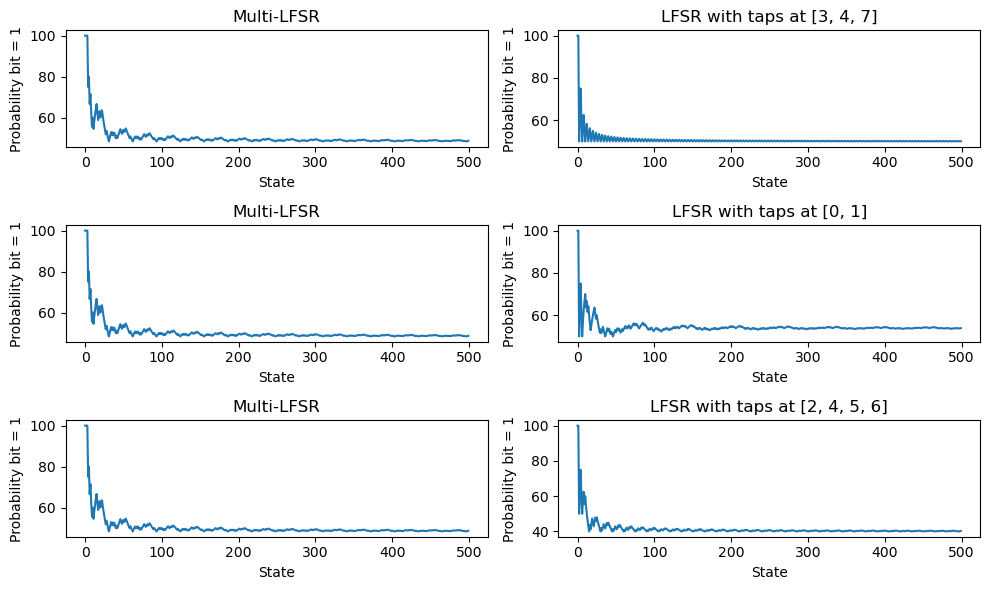

In [12]:
 multilfsr.comparisons_plot(figsize=(10, 6))